In [11]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from walker import Walker, hills_context_map_builder, SquareNextStepBuilder, plot_trajectory

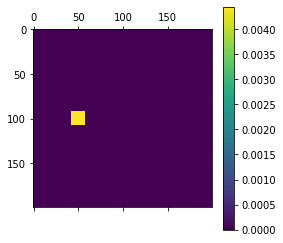

In [12]:
def square_probability(current_i, current_j, width, size):
    grid_ii, grid_jj = np.mgrid[0:size, 0:size]
    inside_mask = (np.abs(grid_ii - current_i) <= width // 2) & (np.abs(grid_jj - current_j) <= width // 2)
    p_next_step = inside_mask / inside_mask.sum()
    return p_next_step

p = square_probability(100, 50, 14, 200)
plt.matshow(p)
plt.colorbar()

# Simulate a trajectory

In [13]:
next_step_builder = SquareNextStepBuilder(size=200, width=5)
walker = Walker.from_context_map_builder(
    size=200,
    context_map_builder=hills_context_map_builder,
    next_step_builder=next_step_builder,
)

i, j = 100, 50
trajectory = []
for _ in range(1000):
    i, j = walker.sample_next_step(i, j)
    trajectory.append((i, j))

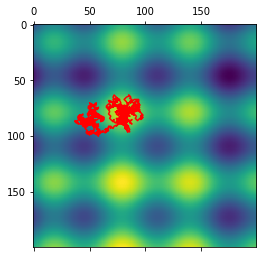

In [14]:
plot_trajectory(trajectory, walker.context_map)
